In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [43]:
ed = pd.read_csv('education_districtwise.csv')
ed.dropna()
ed.head()

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00


<Axes: >

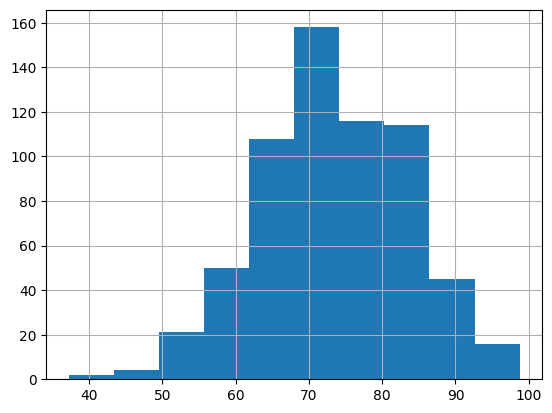

In [44]:
ed['OVERALL_LI'].hist()

In [45]:
mean_overall_li = ed['OVERALL_LI'].mean()
mean_overall_li

np.float64(73.39518927444796)

In [46]:
std_overall_li = ed['OVERALL_LI'].std()
std_overall_li

np.float64(10.098460413782467)

In [47]:
lower_limit = mean_overall_li - 1 * std_overall_li
print(lower_limit)
upper_limit = mean_overall_li + 1 * std_overall_li
print(upper_limit)
((ed['OVERALL_LI'] >= lower_limit) & (ed['OVERALL_LI'] <= upper_limit)).mean()
((ed['OVERALL_LI'] >= lower_limit) & (ed['OVERALL_LI'] <= upper_limit)).mean()

63.29672886066549
83.49364968823042


np.float64(0.6191176470588236)

In [48]:
lower_limit = mean_overall_li - 2 * std_overall_li
print(lower_limit)
upper_limit = mean_overall_li + 2 * std_overall_li
print(upper_limit)
((ed['OVERALL_LI'] >= lower_limit) & (ed['OVERALL_LI'] <= upper_limit)).mean()

53.19826844688302
93.5921101020129


np.float64(0.8897058823529411)

In [49]:
lower_limit = mean_overall_li - 3 * std_overall_li
print(lower_limit)
upper_limit = mean_overall_li + 3 * std_overall_li
print(upper_limit)
((ed['OVERALL_LI'] >= lower_limit) & (ed['OVERALL_LI'] <= upper_limit)).mean()

43.09980803310056
103.69057051579536


np.float64(0.9294117647058824)

In [64]:
ed['OVERALL_LI'] = pd.to_numeric(ed['OVERALL_LI'], errors='coerce')

Our values agree quite well with the empirical rule!

Our values of 61.9%, 88.9%, and 92.9% are very close to the values the empirical rule suggests: roughly 68%, 95%, and 99.7%.

Knowing that your data is normally distributed is useful for analysis because many statistical tests and machine learning models assume a normal distribution. Plus, when your data follows a normal distribution, you can use z-scores to measure the relative position of your values and find outliers in your data.

***Compute z-scores to find outliers***

In [71]:
ed['Z_SCORE'] = stats.zscore(ed['OVERALL_LI'], nan_policy='omit')
ed


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


In [79]:
ed[(ed['Z_SCORE'] > 3) | (ed['Z_SCORE'] < -3)]


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


Using z-scores, we can identify two outlying districts that have unusually low literacy rates: DISTRICT461 and DISTRICT429. The literacy rates in these two districts are more than 3 SDs below the overall mean literacy rate.

Our analysis gives us important information to share. The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy.